In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import skfuzzy.control as ctrl

In [2]:
fuzzy_variables ={}
def configure_rules(temperature, air_quality, daylight_illumination, heater, air_purifier, illuminance_control):
    # Rule 1: Temperature
    rule1 = ctrl.Rule(temperature['cold'], heater['high'])
    rule2 = ctrl.Rule(temperature['comfortable'], heater['medium'])
    rule3 = ctrl.Rule(temperature['hot'], heater['low'])

    # Rule 2: Air Quality
    rule4 = ctrl.Rule(air_quality['unhealthy'], air_purifier['high'])
    rule5 = ctrl.Rule(air_quality['moderate'], air_purifier['medium'])
    rule6 = ctrl.Rule(air_quality['good'], air_purifier['low'])

    # Rule 3: Light Level
    rule7 = ctrl.Rule(daylight_illumination['low'], illuminance_control['high'])
    rule8 = ctrl.Rule(daylight_illumination['moderate'], illuminance_control['medium'])
    rule9 = ctrl.Rule(daylight_illumination['high'], illuminance_control['low'])

    rule10a = ctrl.Rule(antecedent=(temperature['cold'] & air_quality['unhealthy']), consequent=heater['high'])
    rule10b = ctrl.Rule(antecedent=(temperature['cold'] & air_quality['unhealthy']), consequent=air_purifier['medium'])

    rule11 = ctrl.Rule(
        antecedent=(temperature['comfortable'] & daylight_illumination['moderate']),
        consequent=illuminance_control['medium']
    )
    
    rule12 = ctrl.Rule(
        antecedent=(air_quality['good'] & daylight_illumination['high']),
        consequent=illuminance_control['low']
    )

    # Combine all rules into a list
    return [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10a, rule10b, rule11, rule12]

    # Return all the rules
    return [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12]

def configure_fuzzy_logic(chromosome):
    global fuzzy_variables
    # Extracting chromosome values for each parameter
    temperature_chromosome = chromosome[:12]
    air_quality_chromosome = chromosome[12:24]
    daylight_illumination_chromosome = chromosome[24:36]
    heater_chromosome = chromosome[36:47]
    air_purifier_chromosome = chromosome[47:58]
    illuminance_control_chromosome = chromosome[58:]

    # Temperature membership functions (sorted)
    cold_chromosome = sorted(temperature_chromosome[:4])
    comfortable_chromosome = sorted(temperature_chromosome[4:8])
    hot_chromosome = sorted(temperature_chromosome[8:])
    
    temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')
    temperature['cold'] = fuzz.trapmf(temperature.universe, cold_chromosome)
    temperature['comfortable'] = fuzz.trapmf(temperature.universe, comfortable_chromosome)
    temperature['hot'] = fuzz.trapmf(temperature.universe, hot_chromosome)

    # Air Quality membership functions (sorted)
    good_chromosome = sorted(air_quality_chromosome[:4])
    moderate_chromosome = sorted(air_quality_chromosome[4:8])
    unhealthy_chromosome = sorted(air_quality_chromosome[8:])
    
    air_quality = ctrl.Antecedent(np.arange(0, 501, 1), 'air_quality')
    air_quality['good'] = fuzz.trapmf(air_quality.universe, good_chromosome)
    air_quality['moderate'] = fuzz.trapmf(air_quality.universe, moderate_chromosome)
    air_quality['unhealthy'] = fuzz.trapmf(air_quality.universe, unhealthy_chromosome)

    # Light Intensity Level membership functions (sorted)
    low_daylight_illumination_chromosome = sorted(daylight_illumination_chromosome[:4])
    moderate_daylight_illumination_chromosome = sorted(daylight_illumination_chromosome[4:8])
    high_daylight_illumination_chromosome = sorted(daylight_illumination_chromosome[8:])
    
    daylight_illumination = ctrl.Antecedent(np.arange(0, 101, 1), 'daylight_illumination')
    daylight_illumination['low'] = fuzz.trapmf(daylight_illumination.universe, low_daylight_illumination_chromosome)
    daylight_illumination['moderate'] = fuzz.trapmf(daylight_illumination.universe, moderate_daylight_illumination_chromosome)
    daylight_illumination['high'] = fuzz.trapmf(daylight_illumination.universe, high_daylight_illumination_chromosome)

    # Heater membership functions (sorted)
    low_heater_chromosome = sorted(heater_chromosome[:4])
    medium_heater_chromosome = sorted(heater_chromosome[4:7])
    high_heater_chromosome = sorted(heater_chromosome[7:])

    heater = ctrl.Consequent(np.arange(0, 101, 1), 'heater')
    heater['low'] = fuzz.trapmf(heater.universe, low_heater_chromosome)
    heater['medium'] = fuzz.trimf(heater.universe, medium_heater_chromosome)
    heater['high'] = fuzz.trapmf(heater.universe, high_heater_chromosome)


    # Air Purifier membership functions (sorted)
    low_air_purifier_chromosome = sorted(air_purifier_chromosome[:4])
    medium_air_purifier_chromosome = sorted(air_purifier_chromosome[4:7])
    high_air_purifier_chromosome = sorted(air_purifier_chromosome[7:])

    air_purifier = ctrl.Consequent(np.arange(0, 101, 1), 'air_purifier')
    air_purifier['low'] = fuzz.trapmf(air_purifier.universe, low_air_purifier_chromosome)
    air_purifier['medium'] = fuzz.trimf(air_purifier.universe, medium_air_purifier_chromosome)
    air_purifier['high'] = fuzz.trapmf(air_purifier.universe, high_air_purifier_chromosome)

    # illuminance_control Power membership functions (sorted)
    low_illuminance_control_chromosome = sorted(illuminance_control_chromosome[:4])
    medium_illuminance_control_chromosome = sorted(illuminance_control_chromosome[4:7])
    high_illuminance_control_chromosome = sorted(illuminance_control_chromosome[7:])

    illuminance_control = ctrl.Consequent(np.arange(0, 101, 1), 'illuminance_control')
    illuminance_control['low'] = fuzz.trapmf(illuminance_control.universe, low_illuminance_control_chromosome)
    illuminance_control['medium'] = fuzz.trimf(illuminance_control.universe, medium_illuminance_control_chromosome)
    illuminance_control['high'] = fuzz.trapmf(illuminance_control.universe, high_illuminance_control_chromosome)

    # Add rules (this is a placeholder for your fuzzy rules)
    rules = configure_rules(temperature, air_quality, daylight_illumination, heater, air_purifier, illuminance_control)

    # Create control system and simulation
    control_system = ctrl.ControlSystem(rules)
    flc = ctrl.ControlSystemSimulation(control_system)

    fuzzy_variables = {
        'temperature': temperature,
        'air_quality': air_quality,
        'daylight_illumination': daylight_illumination,
        'heater': heater,
        'air_purifier': air_purifier,
        'illuminance_control': illuminance_control,
    }

    return flc



def compute_outputs(temperature, air_quality, daylight_illumination, flc):
    simulation = flc

    # Input values
    simulation.input['temperature'] = temperature
    simulation.input['air_quality'] = air_quality
    simulation.input['daylight_illumination'] = daylight_illumination

    # Compute outputs
    try:
        simulation.compute()
        heater = simulation.output['heater']
        air_purifier = simulation.output['air_purifier']
        illuminance_control = simulation.output['illuminance_control']
        return heater, air_purifier, illuminance_control, False
    except Exception as e:
        # print(f"Error in simulation: {e}")
        return 0,  0, 0, True  # Return 0 outputs and a flag for uncovered region


In [3]:
# Temperature Chromosome
cold_chromosome = [0,0,18,22] # cold
comfortable_chromosome = [18,22,25,28] #comfortable
hot_chromosome =[25,28,40,40] #hot
temperature_chromosome = np.concatenate((cold_chromosome,comfortable_chromosome,hot_chromosome))

# Air quality Chromosome
good = [0,0,50,100] # good AQI
moderate = [80,130,180,230] # moderate AQI
unhealthy = [200,250,500,500] # unhealthy AQI
air_quality_chromosome = np.concatenate((good,moderate,unhealthy))

# Daylight Illuminance Intensity Level Chromosome
low_light = [0,0,15,30] # low daylight illumination in percent
moderate_light = [20,40,60,80] # moderate daylight illumination in percent
high_light = [60,80,100,100] # high daylight illumination in percent
daylight_illumination_chromosome = np.concatenate((low_light,moderate_light,high_light))

# Heater Chromosome
low_heater = [0, 0, 30, 40]  # low
medium_heater = [30, 50, 70]  # medium
high_heater = [70, 80, 100, 100]  # high
heater_chromosome = np.concatenate((low_heater,medium_heater,high_heater))


# Air Purifier Chromosome
low_air_purifier = [0,0,20,40] # low power
medium_air_purifier = [30,50,70] # medium power
high_air_purifier = [60,80,100,100] # high power
air_purifier_chromosome = np.concatenate((low_air_purifier,medium_air_purifier,high_air_purifier))

# illuminance_control Power Chromosome
low_illuminance_control = [0,0,20,40] # low power
medium_illuminance_control = [30,50,70] # medium power
high_illuminance_control = [60,80,100,100] # high power
illuminance_control_chromosome = np.concatenate((low_illuminance_control,medium_illuminance_control,high_illuminance_control))

chromosome = np.concatenate((temperature_chromosome,air_quality_chromosome,daylight_illumination_chromosome,heater_chromosome,air_purifier_chromosome,illuminance_control_chromosome))

initial_chromosome = chromosome

flc = configure_fuzzy_logic(chromosome)


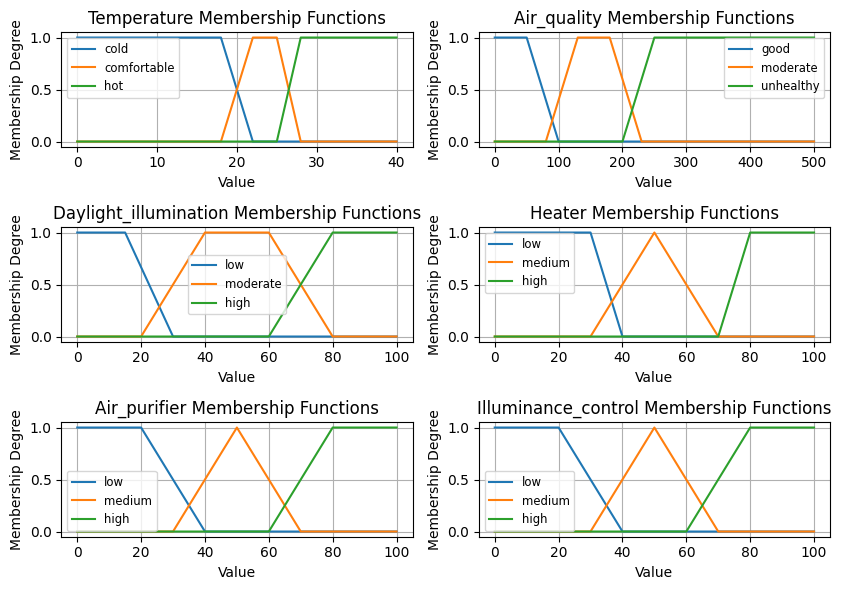

In [4]:
def plot_all_membership_functions(fuzzy_variables):
    """
    Plot membership functions for all fuzzy variables in a single figure using subplots.

    Parameters:
    - fuzzy_variables: Dictionary of fuzzy variables (inputs and outputs).
    """
    num_variables = len(fuzzy_variables)
    columns = 2
    rows = (num_variables + columns - 1) // columns  # Calculate the number of rows needed

    # Create a figure with subplots
    fig, axes = plt.subplots(rows, columns, figsize=(8.5, 2 * rows))
    axes = axes.flatten()  # Flatten the grid for easier indexing

    # Plot each variable in a separate subplot
    for idx, (name, variable) in enumerate(fuzzy_variables.items()):
        ax = axes[idx]
        for term_name, mf in variable.terms.items():
            ax.plot(variable.universe, mf.mf, label=term_name)
        ax.set_title(f"{name.capitalize()} Membership Functions")
        ax.set_xlabel("Value")
        ax.set_ylabel("Membership Degree")
        ax.legend(fontsize="small")
        ax.grid(True)

    # Hide any unused subplots
    for idx in range(len(fuzzy_variables), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to plot all membership functions
plot_all_membership_functions(fuzzy_variables)


In [5]:
dataset = [
    {'inputs': {'temperature': 0, 'air_quality': 0, 'daylight_illumination': 0}, 'expected': {'heater': 100, 'air_purifier': 0, 'illuminance_control': 100}},
    {'inputs': {'temperature': 0, 'air_quality': 10, 'daylight_illumination': 10}, 'expected': {'heater': 100, 'air_purifier': 4, 'illuminance_control': 90}},
    {'inputs': {'temperature': 20, 'air_quality': 30, 'daylight_illumination': 30}, 'expected': {'heater': 50, 'air_purifier': 12, 'illuminance_control': 70}},
    {'inputs': {'temperature': 20, 'air_quality': 50, 'daylight_illumination': 20}, 'expected': {'heater': 50, 'air_purifier': 20, 'illuminance_control': 80}},
    {'inputs': {'temperature': 40, 'air_quality': 70, 'daylight_illumination': 40}, 'expected': {'heater': 0, 'air_purifier': 28, 'illuminance_control': 60}},
    {'inputs': {'temperature': 40, 'air_quality': 100, 'daylight_illumination': 50}, 'expected': {'heater': 0, 'air_purifier': 40, 'illuminance_control': 50}},
    {'inputs': {'temperature': 10, 'air_quality': 160, 'daylight_illumination': 25}, 'expected': {'heater': 82, 'air_purifier': 64, 'illuminance_control': 75}},
    {'inputs': {'temperature': 30, 'air_quality': 180, 'daylight_illumination': 35}, 'expected': {'heater': 7, 'air_purifier': 72, 'illuminance_control': 65}},
    {'inputs': {'temperature': 15, 'air_quality': 200, 'daylight_illumination': 55}, 'expected': {'heater': 70, 'air_purifier': 75, 'illuminance_control': 45}},
    {'inputs': {'temperature': 25, 'air_quality': 250, 'daylight_illumination': 60}, 'expected': {'heater': 52, 'air_purifier': 82, 'illuminance_control': 40}},
    {'inputs': {'temperature': 5, 'air_quality': 300, 'daylight_illumination': 70}, 'expected': {'heater': 90, 'air_purifier': 90, 'illuminance_control': 0}},
    {'inputs': {'temperature': 35, 'air_quality': 400, 'daylight_illumination': 80}, 'expected': {'heater': 0, 'air_purifier': 96, 'illuminance_control': 0}},
    {'inputs': {'temperature': 20, 'air_quality': 450, 'daylight_illumination': 90}, 'expected': {'heater': 50, 'air_purifier': 96, 'illuminance_control': 0}},
    {'inputs': {'temperature': 10, 'air_quality': 40, 'daylight_illumination': 100}, 'expected': {'heater': 82, 'air_purifier': 16, 'illuminance_control': 0}},
    {'inputs': {'temperature': 30, 'air_quality': 60, 'daylight_illumination': 85}, 'expected': {'heater': 7, 'air_purifier': 24, 'illuminance_control': 0}},
]



Simulation 1:
Inputs: Temperature = 0, Air Quality = 0 AQI, Light Level = 0 %
Expected: Heater = 100%, Air Purifier Speed = 0%, illuminance_control = 100%
Computed: Heater = 87.33%, Air Purifier Speed = 15.56%, illuminance_control = 84.44 %
------


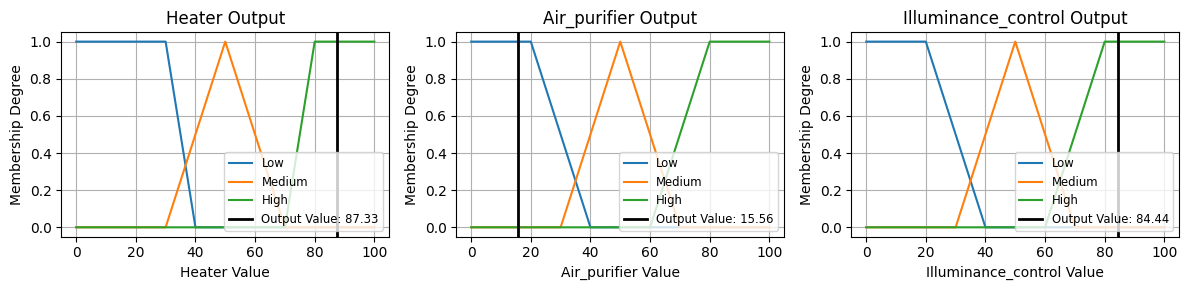

Simulation 2:
Inputs: Temperature = 0, Air Quality = 10 AQI, Light Level = 10 %
Expected: Heater = 100%, Air Purifier Speed = 4%, illuminance_control = 90%
Computed: Heater = 87.33%, Air Purifier Speed = 15.56%, illuminance_control = 84.44 %
------


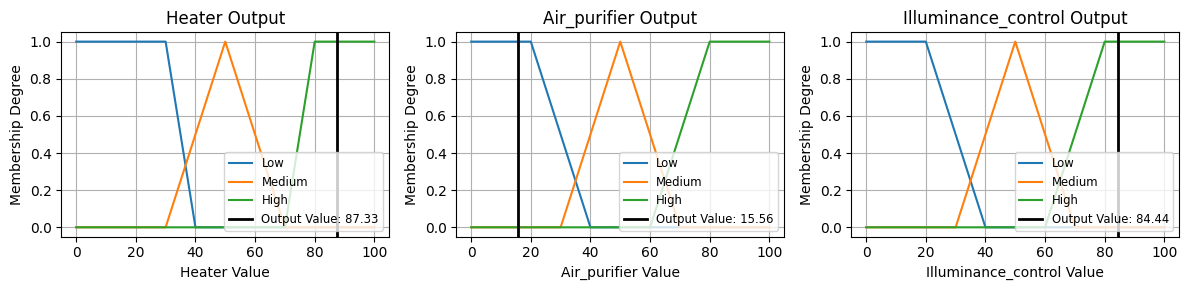

Simulation 3:
Inputs: Temperature = 20, Air Quality = 30 AQI, Light Level = 30 %
Expected: Heater = 50%, Air Purifier Speed = 12%, illuminance_control = 70%
Computed: Heater = 67.32%, Air Purifier Speed = 15.56%, illuminance_control = 50.00 %
------


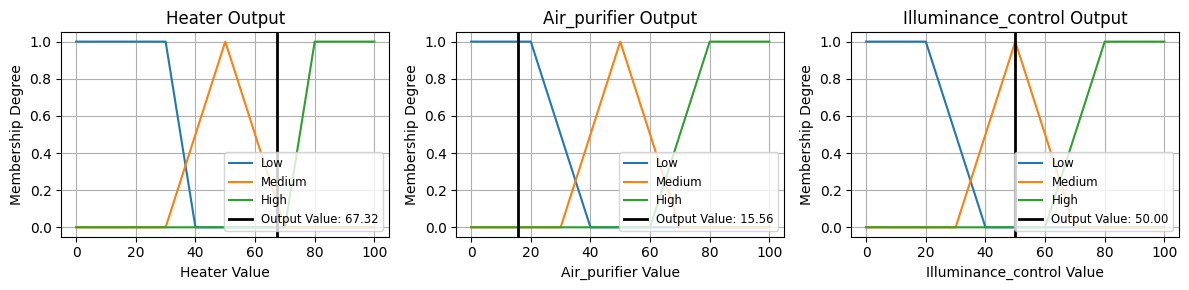

Simulation 4:
Inputs: Temperature = 20, Air Quality = 50 AQI, Light Level = 20 %
Expected: Heater = 50%, Air Purifier Speed = 20%, illuminance_control = 80%
Computed: Heater = 67.32%, Air Purifier Speed = 15.56%, illuminance_control = 83.11 %
------


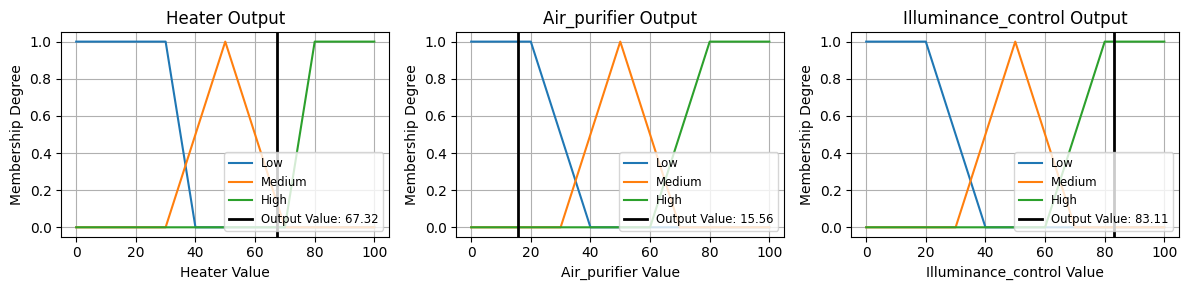

Simulation 5:
Inputs: Temperature = 40, Air Quality = 70 AQI, Light Level = 40 %
Expected: Heater = 0%, Air Purifier Speed = 28%, illuminance_control = 60%
Computed: Heater = 17.62%, Air Purifier Speed = 17.18%, illuminance_control = 50.00 %
------


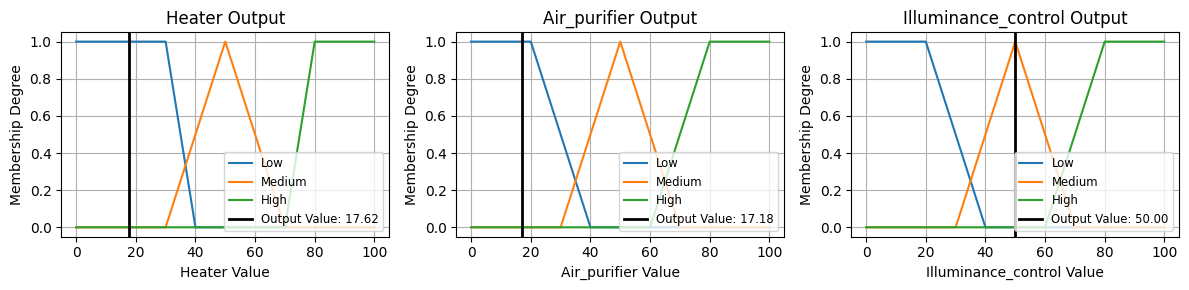

Simulation 6:
Inputs: Temperature = 40, Air Quality = 100 AQI, Light Level = 50 %
Expected: Heater = 0%, Air Purifier Speed = 40%, illuminance_control = 50%
Computed: Heater = 17.62%, Air Purifier Speed = 50.00%, illuminance_control = 50.00 %
------


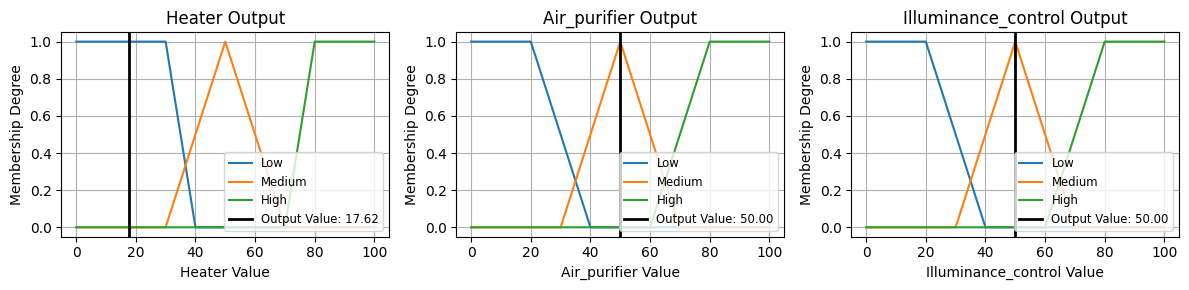

Simulation 7:
Inputs: Temperature = 10, Air Quality = 160 AQI, Light Level = 25 %
Expected: Heater = 82%, Air Purifier Speed = 64%, illuminance_control = 75%
Computed: Heater = 87.33%, Air Purifier Speed = 50.00%, illuminance_control = 68.64 %
------


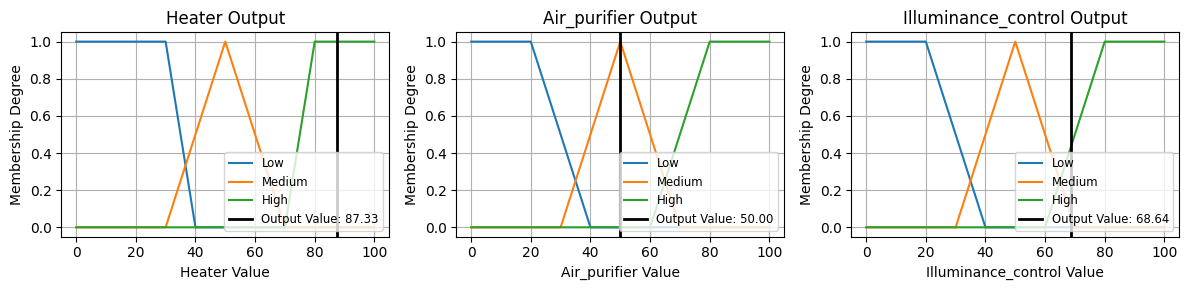

Simulation 8:
Inputs: Temperature = 30, Air Quality = 180 AQI, Light Level = 35 %
Expected: Heater = 7%, Air Purifier Speed = 72%, illuminance_control = 65%
Computed: Heater = 17.62%, Air Purifier Speed = 50.00%, illuminance_control = 50.00 %
------


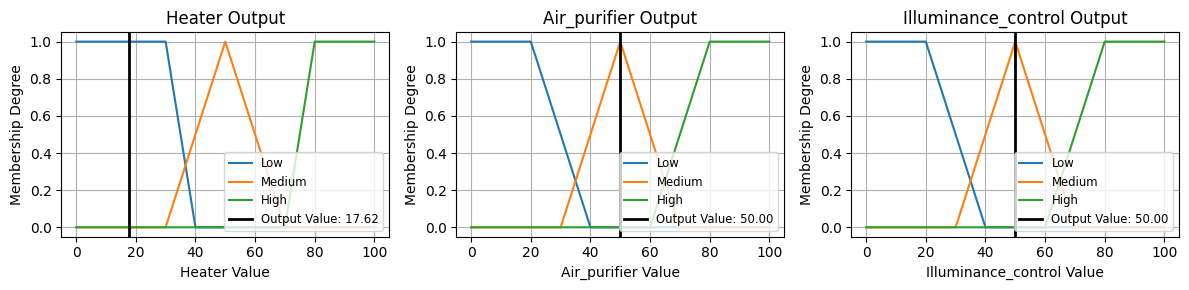

Simulation 9:
Inputs: Temperature = 15, Air Quality = 200 AQI, Light Level = 55 %
Expected: Heater = 70%, Air Purifier Speed = 75%, illuminance_control = 45%
Computed: Heater = 87.33%, Air Purifier Speed = 50.00%, illuminance_control = 50.00 %
------


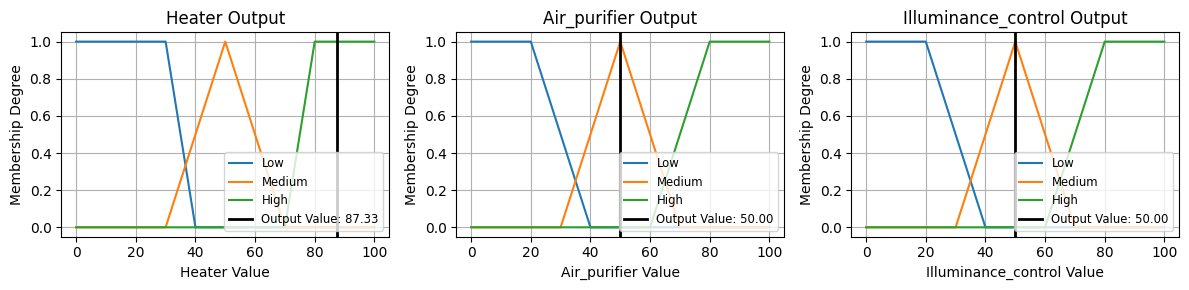

Simulation 10:
Inputs: Temperature = 25, Air Quality = 250 AQI, Light Level = 60 %
Expected: Heater = 52%, Air Purifier Speed = 82%, illuminance_control = 40%
Computed: Heater = 50.00%, Air Purifier Speed = 84.44%, illuminance_control = 50.00 %
------


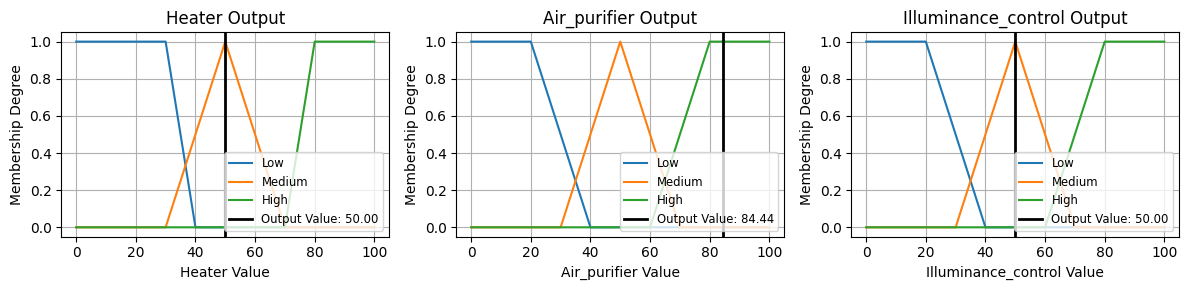

Simulation 11:
Inputs: Temperature = 5, Air Quality = 300 AQI, Light Level = 70 %
Expected: Heater = 90%, Air Purifier Speed = 90%, illuminance_control = 0%
Computed: Heater = 87.33%, Air Purifier Speed = 70.81%, illuminance_control = 32.47 %
------


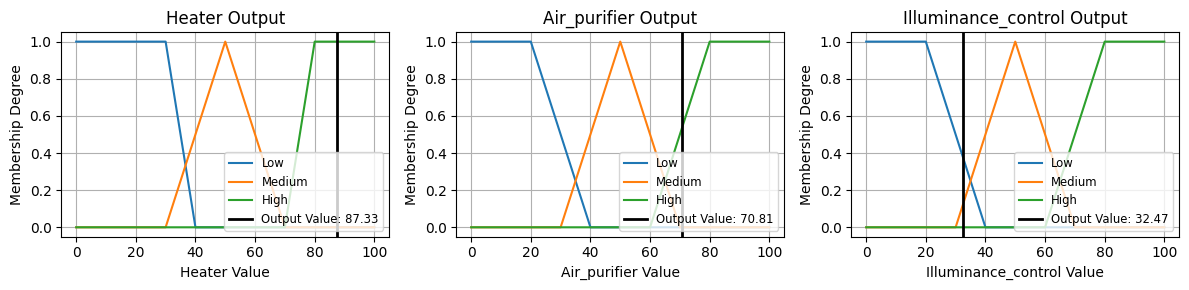

Simulation 12:
Inputs: Temperature = 35, Air Quality = 400 AQI, Light Level = 80 %
Expected: Heater = 0%, Air Purifier Speed = 96%, illuminance_control = 0%
Computed: Heater = 17.62%, Air Purifier Speed = 84.44%, illuminance_control = 15.56 %
------


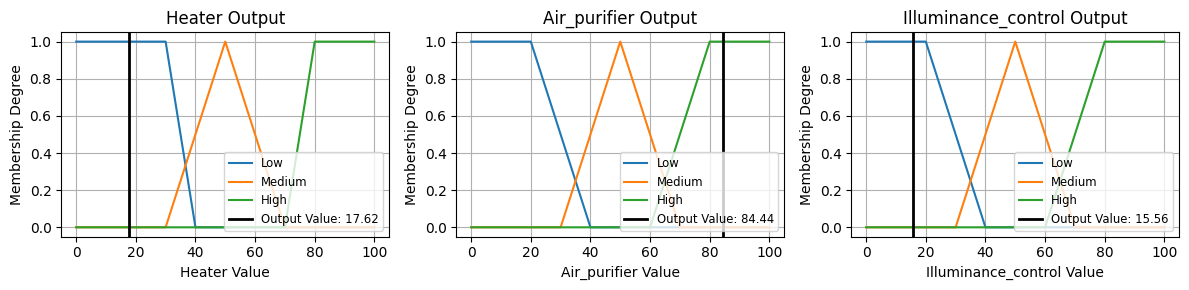

Simulation 13:
Inputs: Temperature = 20, Air Quality = 450 AQI, Light Level = 90 %
Expected: Heater = 50%, Air Purifier Speed = 96%, illuminance_control = 0%
Computed: Heater = 67.32%, Air Purifier Speed = 73.19%, illuminance_control = 15.56 %
------


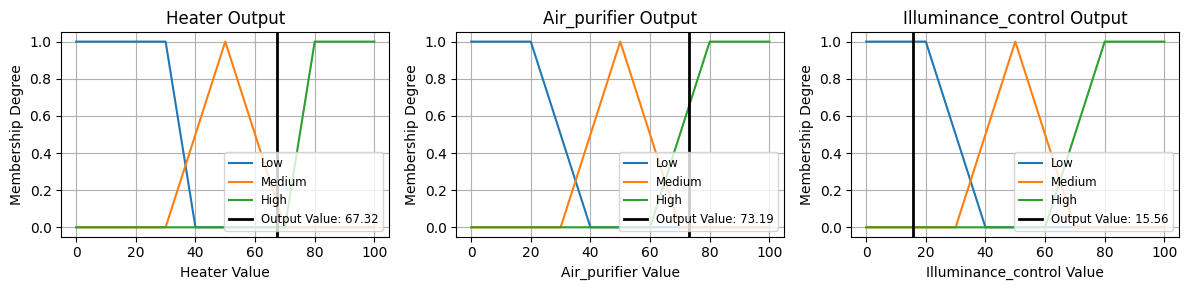

Simulation 14:
Inputs: Temperature = 10, Air Quality = 40 AQI, Light Level = 100 %
Expected: Heater = 82%, Air Purifier Speed = 16%, illuminance_control = 0%
Computed: Heater = 87.33%, Air Purifier Speed = 15.56%, illuminance_control = 15.56 %
------


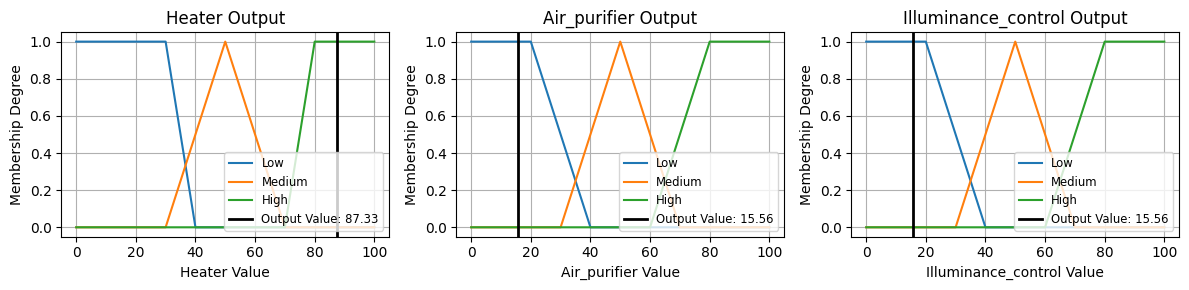

Simulation 15:
Inputs: Temperature = 30, Air Quality = 60 AQI, Light Level = 85 %
Expected: Heater = 7%, Air Purifier Speed = 24%, illuminance_control = 0%
Computed: Heater = 17.62%, Air Purifier Speed = 16.33%, illuminance_control = 15.56 %
------


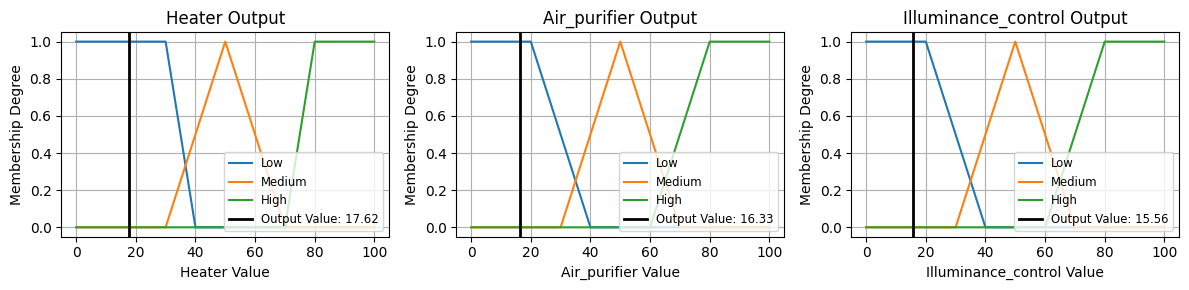

In [6]:
def plot_simulation_outputs(simulation, output_variables):
    """
    Plot output membership functions side by side for a single simulation.

    Parameters:
    - simulation: The fuzzy control system simulation object.
    - output_variables: Dictionary of fuzzy variables, including outputs (consequents).
    """
    # Filter only output variables (consequents)
    outputs = {var_name: variable for var_name, variable in output_variables.items() if isinstance(variable, ctrl.Consequent)}

    # Set grid layout (3 columns per row)
    num_outputs = len(outputs)
    columns = 3
    rows = (num_outputs + columns - 1) // columns  # Ceiling division to calculate rows

    # Create subplots with a smaller figure size
    fig, axes = plt.subplots(rows, columns, figsize=(12, 3 * rows), squeeze=False)
    axes = axes.flatten()  # Flatten the grid for easier indexing

    # Plot each output variable in its subplot
    for idx, (output_name, output_variable) in enumerate(outputs.items()):
        ax = axes[idx]
        
        # Plot membership functions for each term
        for term_name, membership_function in output_variable.terms.items():
            ax.plot(
                output_variable.universe, 
                membership_function.mf, 
                label=f"{term_name.capitalize()}"
            )
        
        # Highlight the computed output value
        computed_value = simulation.output[output_name]
        ax.axvline(
            computed_value, 
            color='black', 
            linestyle='-', 
            linewidth=2, 
            label=f"Output Value: {computed_value:.2f}"
        )

        # Customize each subplot
        ax.set_title(f"{output_name.capitalize()} Output")
        ax.set_xlabel(f"{output_name.capitalize()} Value")
        ax.set_ylabel("Membership Degree")
        ax.legend(loc="lower right", fontsize="small")
        ax.grid(True)

    # Hide unused subplots
    for idx in range(num_outputs, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

# Process each simulation from the dataset
for idx, data_point in enumerate(dataset):
    temp_input = data_point['inputs']['temperature']
    air_quality_input = data_point['inputs']['air_quality']
    daylight_illumination_input = data_point['inputs']['daylight_illumination']

    # Run fuzzy logic simulation
    heater_output, air_purifier_output, illuminance_control_output, has_error = compute_outputs(
        temp_input, air_quality_input, daylight_illumination_input, flc
    )

    if not has_error:
        print(f"Simulation {idx + 1}:")
        print(f"Inputs: Temperature = {temp_input}, Air Quality = {air_quality_input} AQI, Light Level = {daylight_illumination_input} %")
        print(f"Expected: Heater = {data_point['expected']['heater']}%, Air Purifier Speed = {data_point['expected']['air_purifier']}%, illuminance_control = {data_point['expected']['illuminance_control']}%")
        print(f"Computed: Heater = {heater_output:.2f}%, Air Purifier Speed = {air_purifier_output:.2f}%, illuminance_control = {illuminance_control_output:.2f} %")
        print("------")

        # Plot outputs for this simulation in a separate grid
        plot_simulation_outputs(flc, fuzzy_variables)
    else:
        print(f"Simulation {idx + 1}: Error in fuzzy logic computation.")

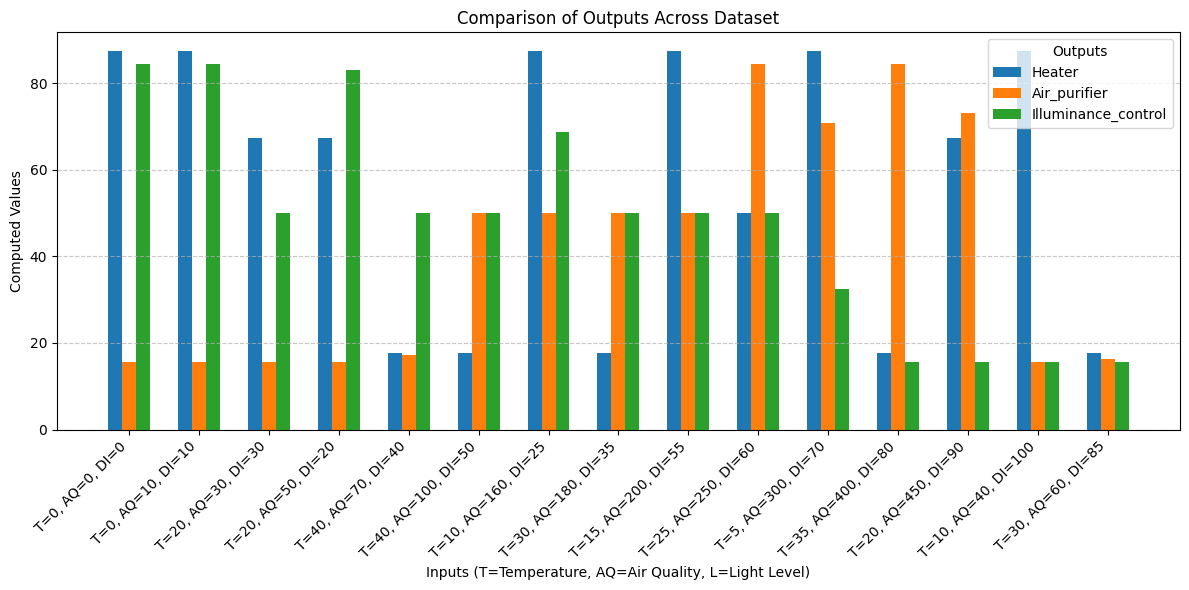

In [7]:
def create_combined_bar_plot_with_inputs(dataset, simulation, output_names):
    """
    Create a single bar plot to compare outputs for all entries in the dataset with real input labels.

    Parameters:
    - dataset: List of input-output data points.
    - simulation: The fuzzy control system simulation object.
    - output_names: List of output variable names to plot.
    """
    # Prepare data for the bar plot
    num_entries = len(dataset)
    x = np.arange(num_entries)  # Entry indices
    width = 0.2  # Bar width

    # Store computed values for each output
    computed_values = {output_name: [] for output_name in output_names}
    labels = []  # Store labels based on real inputs

    # Compute output values for all dataset entries
    for data_point in dataset:
        temperature = data_point['inputs']['temperature']
        air_quality = data_point['inputs']['air_quality']
        daylight_illumination = data_point['inputs']['daylight_illumination']

        simulation.input['temperature'] = temperature
        simulation.input['air_quality'] = air_quality
        simulation.input['daylight_illumination'] = daylight_illumination
        simulation.compute()

        labels.append(f"T={temperature}, AQ={air_quality}, DI={daylight_illumination}")
        for output_name in output_names:
            computed_values[output_name].append(simulation.output[output_name])

    # Create the bar plot
    plt.figure(figsize=(12, 6))
    for i, output_name in enumerate(output_names):
        plt.bar(x + i * width, computed_values[output_name], width, label=output_name.capitalize())

    # Customize the plot
    plt.title("Comparison of Outputs Across Dataset")
    plt.xlabel("Inputs (T=Temperature, AQ=Air Quality, L=Light Level)")
    plt.ylabel("Computed Values")
    plt.xticks(x + width, labels, rotation=45, ha='right')
    plt.legend(title="Outputs")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Define the output variables to compare
output_names = ['heater', 'air_purifier', 'illuminance_control']

# Create a combined bar plot for the entire dataset
create_combined_bar_plot_with_inputs(dataset, flc, output_names)


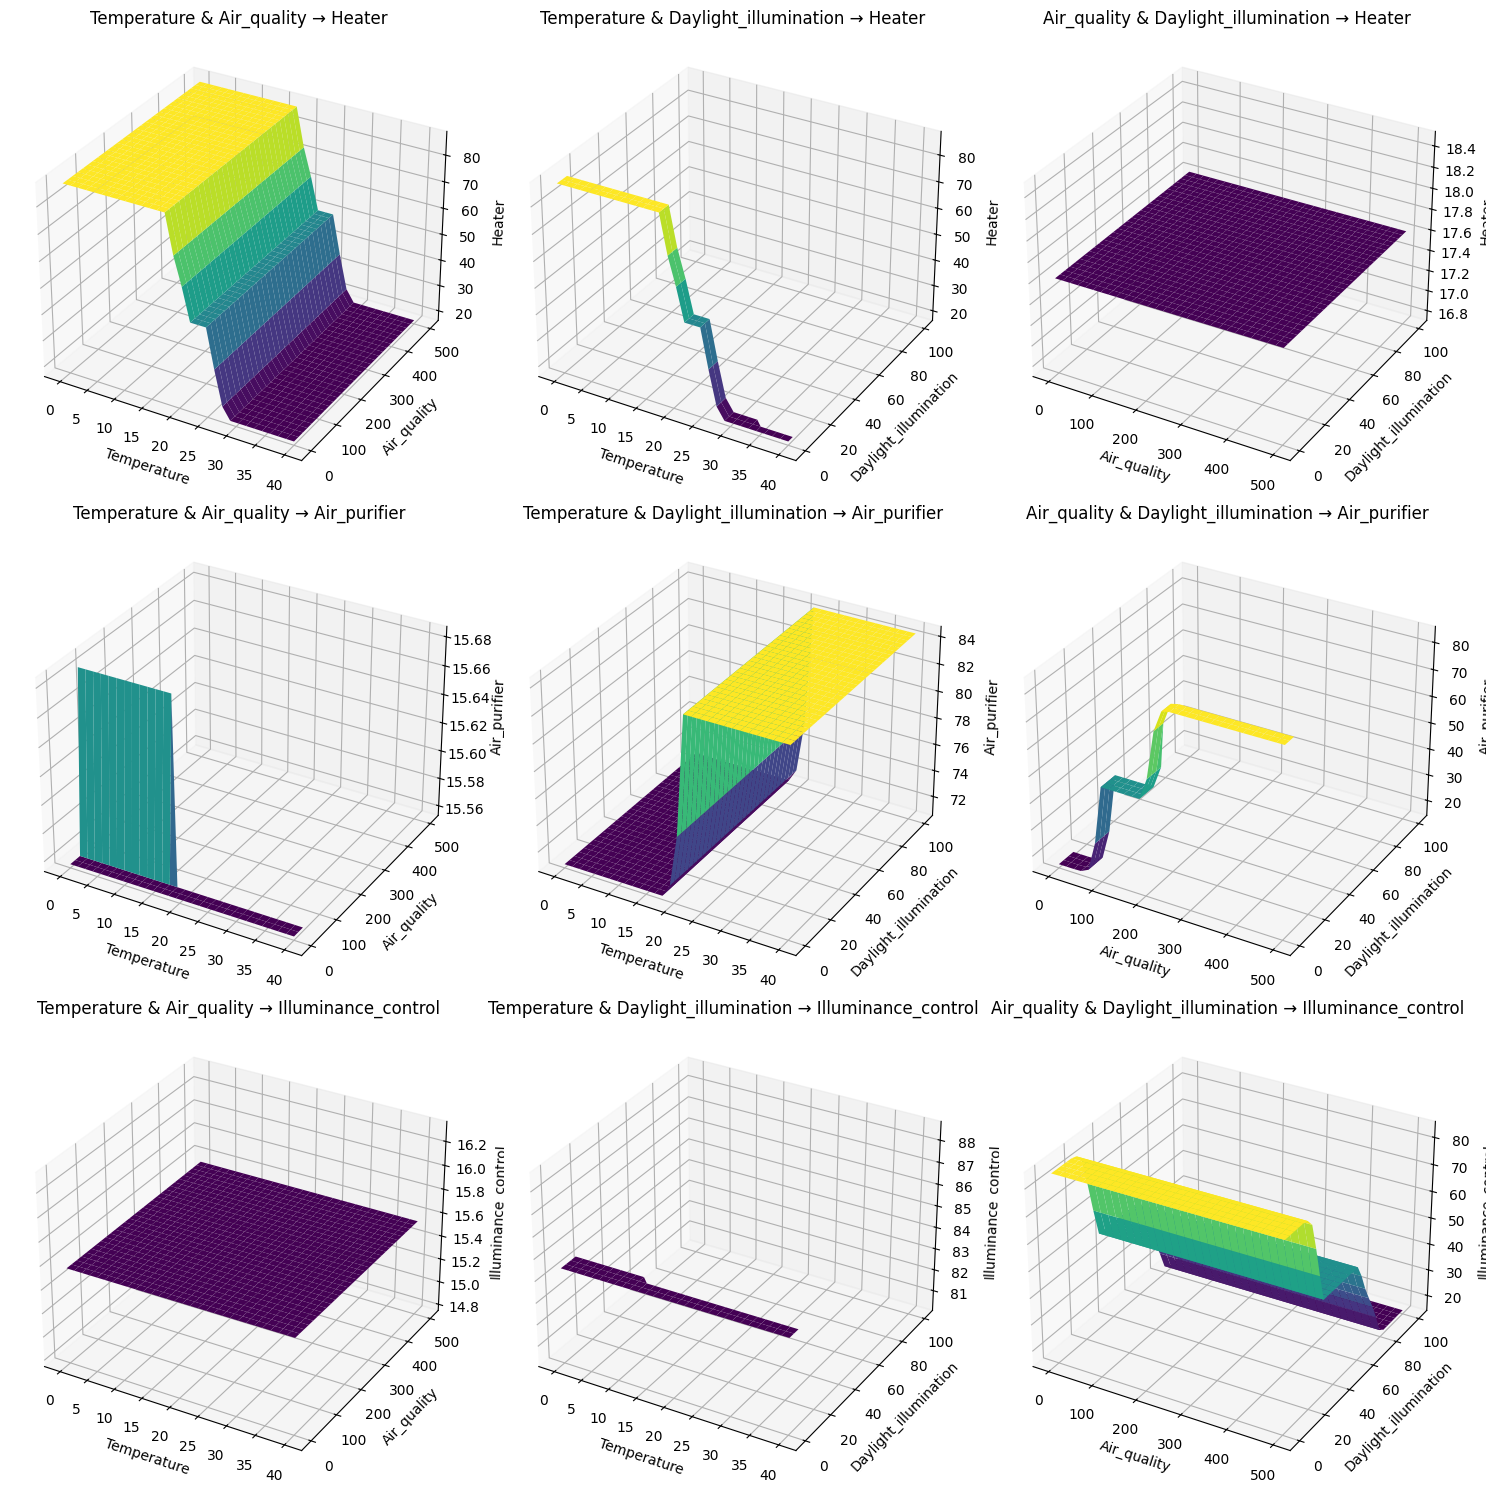

In [8]:
from mpl_toolkits.mplot3d import Axes3D

def generate_all_control_surfaces_in_one_figure(flc, inputs, outputs, ranges, resolution=30):
    """
    Generate all control surfaces in a single figure with subplots.

    Parameters:
    - flc: The fuzzy logic controller simulation object.
    - inputs: List of input variable names.
    - outputs: List of output variable names.
    - ranges: Dictionary mapping input variable names to their ranges.
    - resolution: Number of steps for the grid of input values.
    """
    num_outputs = len(outputs)
    num_inputs = len(inputs)
    total_plots = num_outputs * (num_inputs * (num_inputs - 1) // 2)
    cols = 3  # Number of columns in the grid
    rows = (total_plots + cols - 1) // cols  # Calculate required rows

    fig = plt.figure(figsize=(15, 5 * rows))
    plot_idx = 1

    for output in outputs:
        for i, input1 in enumerate(inputs):
            for j, input2 in enumerate(inputs):
                if i >= j:  # Skip duplicates and self-pairing
                    continue

                # Create meshgrid for the input variables
                x = np.linspace(ranges[input1][0], ranges[input1][1], resolution)
                y = np.linspace(ranges[input2][0], ranges[input2][1], resolution)
                x, y = np.meshgrid(x, y)
                z = np.zeros_like(x)

                for a in range(resolution):
                    for b in range(resolution):
                        flc.input[input1] = x[a, b]
                        flc.input[input2] = y[a, b]
                        try:
                            flc.compute()
                            z[a, b] = flc.output[output]
                        except:
                            z[a, b] = np.nan

                # Add subplot
                ax = fig.add_subplot(rows, cols, plot_idx, projection='3d')
                ax.plot_surface(x, y, z, cmap='viridis')
                ax.set_title(f"{input1.capitalize()} & {input2.capitalize()} → {output.capitalize()}")
                ax.set_xlabel(f"{input1.capitalize()}")
                ax.set_ylabel(f"{input2.capitalize()}")
                ax.set_zlabel(f"{output.capitalize()}")
                plot_idx += 1

    plt.tight_layout()
    plt.show()

# Define input and output variables
inputs = ['temperature', 'air_quality', 'daylight_illumination']
outputs = ['heater', 'air_purifier', 'illuminance_control']

# Define the ranges for each input variable
ranges = {
    'temperature': [0, 40],
    'air_quality': [0, 500],
    'daylight_illumination': [0, 100]
}

# Generate all control surfaces in a single figure
generate_all_control_surfaces_in_one_figure(flc, inputs, outputs, ranges)

In [9]:
def calculate_mse(dataset, flc):
    mse = {'heater': 0, 'air_purifier': 0, 'illuminance_control': 0}
    for data in dataset:
        temp = data['inputs']['temperature']
        aqi = data['inputs']['air_quality']
        di = data['inputs']['daylight_illumination']
        expected = data['expected']

        # Compute outputs
        computed_heater, computed_air, computed_light, _ = compute_outputs(temp, aqi, di, flc)

        # Accumulate squared errors
        mse['heater'] += (expected['heater'] - computed_heater) ** 2
        mse['air_purifier'] += (expected['air_purifier'] - computed_air) ** 2
        mse['illuminance_control'] += (expected['illuminance_control'] - computed_light) ** 2

    # Calculate average MSE
    for key in mse.keys():
        mse[key] /= len(dataset)

    return mse

# Calculate MSE
mse_results = calculate_mse(dataset, flc)
print(f"MSE Results: {mse_results}")


MSE Results: {'heater': np.float64(183.06539413917216), 'air_purifier': np.float64(201.13243582634135), 'illuminance_control': np.float64(212.99487652933186)}


### Task 2.2 Optimizing FLC Using GA

In [10]:
import numpy as np

def initialize_population(pop_size, chromosome_length):
    population = []
    for _ in range(pop_size):
        # Randomly initialize the chromosome with values
        temperature_params = np.sort(np.random.uniform(0, 40, 12))  # temperature values (cold, comfortable, hot ranges)
        air_quality_params = np.sort(np.random.uniform(0, 500, 12))  # air quality index range
        daylight_illumination_params = np.sort(np.random.uniform(0, 100, 12))  # light intensity levels
        heater_params = np.sort(np.random.uniform(0, 100, 11))  # heater power percentage
        air_purifier_params = np.sort(np.random.uniform(0, 100, 11))  # air purifier power percentage
        illuminance_control_params = np.sort(np.random.uniform(0, 100, 11))  # illuminance_control power percentage

        # Concatenate all parameters to form the chromosome for this individual
        individual = np.concatenate((temperature_params, air_quality_params, daylight_illumination_params,
                                     heater_params, air_purifier_params, illuminance_control_params))
        population.append(individual)
    
    print(f"Initialized population with {pop_size} individuals.")
    return population


Initialized population with 50 individuals.

=== Generation 1 ===
Best Fitness in Generation 1: 8267.76309193709

=== Generation 2 ===
Best Fitness in Generation 2: 7459.943632228854

=== Generation 3 ===
Best Fitness in Generation 3: 7069.963669931421

=== Generation 4 ===
Best Fitness in Generation 4: 6877.85627732381

=== Generation 5 ===
Best Fitness in Generation 5: 6877.85627732381

=== Generation 6 ===
Best Fitness in Generation 6: 6154.359663914404

=== Generation 7 ===
Best Fitness in Generation 7: 5169.203419296933

=== Generation 8 ===
Best Fitness in Generation 8: 5169.203419296933

=== Generation 9 ===
Best Fitness in Generation 9: 5169.203419296933

=== Generation 10 ===
Best Fitness in Generation 10: 4948.673103693509

=== Generation 11 ===
Best Fitness in Generation 11: 4561.182980125126

=== Generation 12 ===
Best Fitness in Generation 12: 3575.1450618430135

=== Generation 13 ===
Best Fitness in Generation 13: 3503.716908130418

=== Generation 14 ===
Best Fitness in G

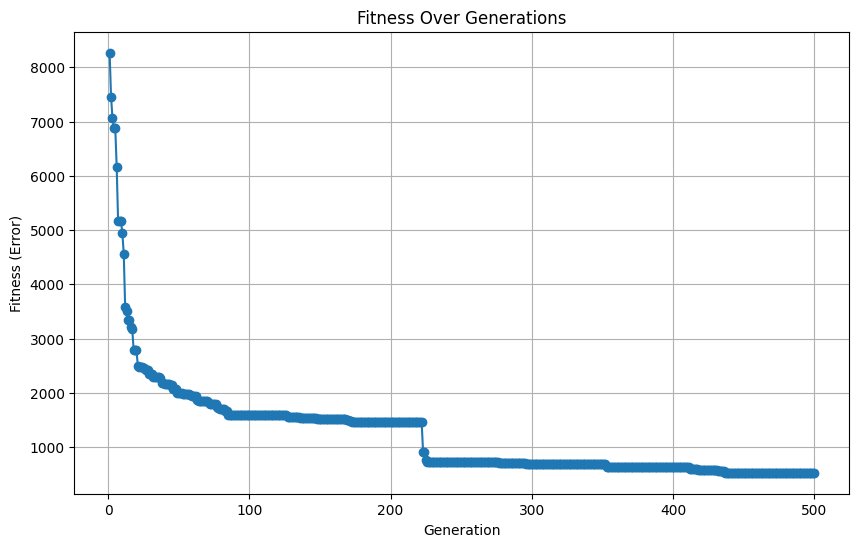


=== Optimization Complete ===
Best Overall Fitness: 526.1018322386324
Best Chromosome: [0.00000000e+00 0.00000000e+00 2.67925197e+01 2.38964764e+01
 2.09332252e+01 2.46901062e+01 3.02726266e+01 1.48235741e+01
 4.21545515e+00 4.00000000e+01 4.00000000e+01 2.28690646e+01
 0.00000000e+00 1.13225686e+02 0.00000000e+00 1.92705179e+02
 1.13066826e+02 4.36418485e+01 1.61210550e+02 3.58347795e+02
 1.91531896e+02 1.77374424e+02 2.87426495e+02 4.53637044e+02
 0.00000000e+00 0.00000000e+00 3.12744304e+01 6.55188955e+01
 6.34077286e+01 5.77783131e+01 2.06550788e+01 5.88462960e+01
 1.45715757e+01 8.65382239e+01 1.00000000e+02 1.00000000e+02
 7.36487073e+00 0.00000000e+00 3.55404914e+00 0.00000000e+00
 1.17623188e+01 5.52174084e+01 4.46485732e+01 9.54180234e+01
 8.16570299e+01 9.57747913e+01 9.98665567e+01 0.00000000e+00
 2.19280769e+00 2.36503904e+01 1.58844908e+01 8.92882463e+01
 7.95771554e+01 1.00000000e+02 8.50991682e+01 8.73351151e+01
 7.43539760e+01 1.00000000e+02 0.00000000e+00 5.48523844e+

In [19]:
def fitness_function(chromosome, dataset):
    flc = configure_fuzzy_logic(chromosome)
    total_error = 0
    uncovered_penalty = 1000
    general_error_threshold = 20
    high_error_penalty_factor = 2  # General penalization factor
    edge_case_penalty_weight = 3  # Higher weight for edge cases
    individual_errors = []

    for data in dataset:
        temperature = data['inputs']['temperature']
        air_quality = data['inputs']['air_quality']
        daylight_illumination = data['inputs']['daylight_illumination']
        expected_heater = data['expected']['heater']
        expected_air_purifier = data['expected']['air_purifier']
        expected_illuminance_control = data['expected']['illuminance_control']

        heater, air_purifier, illuminance_control, uncovered = compute_outputs(temperature, air_quality, daylight_illumination, flc)



        if uncovered:
            total_error += uncovered_penalty
            individual_errors.append(uncovered_penalty)
            continue
        
        error_heater = abs(heater - expected_heater)
        error_air_purifier = abs(air_purifier - expected_air_purifier)
        error_illuminance_control = abs(illuminance_control - expected_illuminance_control)
        error = abs(heater - expected_heater) + abs(air_purifier - expected_air_purifier) + abs(illuminance_control - expected_illuminance_control)

        # Penalize edge cases (e.g., extreme AQI or temperature)
        if air_quality > 400 or temperature < 5 or temperature > 35:
            error *= edge_case_penalty_weight

        # General penalization for high errors
        if error > general_error_threshold:
            error *= high_error_penalty_factor


        total_error += error
        individual_errors.append(error)


    average_error = total_error / len(dataset)

    
    return total_error, average_error, individual_errors



def tournament_selection(population, fitnesses, tournament_size=3):
    if len(population) < 2:
        raise ValueError("Population size is too small for tournament selection.")

    selected = []
    for _ in range(len(population)):
        competitors = np.random.choice(len(population), min(tournament_size, len(population)), replace=False)
        winner_idx = competitors[np.argmin([fitnesses[i] for i in competitors])]
        selected.append(population[winner_idx])
    return selected

# def single_point_crossover(parent1, parent2):
#     crossover_point = np.random.randint(1, len(parent1) - 1)
#     child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
#     return (child)

def single_point_crossover(parent1, parent2, crossover_rate=0.8):
    # Perform crossover based on the crossover rate
    if np.random.rand() < crossover_rate:
        crossover_point = np.random.randint(1, len(parent1) - 1)
        child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    else:
        # No crossover, child is a copy of one of the parents
        child = parent1.copy() if np.random.rand() < 0.5 else parent2.copy()
    return child



def gaussian_mutation(chromosome, mutation_rate=0.1, sigma=5):
    temperature_chromosome = chromosome[:12]
    air_quality_chromosome = chromosome[12:24]
    daylight_illumination_chromosome = chromosome[24:36]
    heater_chromosome = chromosome[36:47]
    air_purifier_chromosome = chromosome[47:58]
    illuminance_control_chromosome = chromosome[58:]

    # Apply mutation individually to each segment
    for i in range(len(temperature_chromosome)):
        if np.random.rand() < mutation_rate:
            temperature_chromosome[i] += np.random.normal(0, sigma)
            temperature_chromosome[i] = np.clip(temperature_chromosome[i], 0, 40)

    for i in range(len(air_quality_chromosome)):
        if np.random.rand() < mutation_rate:
            air_quality_chromosome[i] += np.random.normal(0, sigma+20)
            air_quality_chromosome[i] = np.clip(air_quality_chromosome[i], 0, 500)

    for i in range(len(daylight_illumination_chromosome)):
        if np.random.rand() < mutation_rate:
            daylight_illumination_chromosome[i] += np.random.normal(0, sigma)
            daylight_illumination_chromosome[i] = np.clip(daylight_illumination_chromosome[i], 0, 100)

    for i in range(len(heater_chromosome)):
        if np.random.rand() < mutation_rate:
            heater_chromosome[i] += np.random.normal(0, sigma)
            heater_chromosome[i] = np.clip(heater_chromosome[i], 0, 100)

    for i in range(len(air_purifier_chromosome)):
        if np.random.rand() < mutation_rate:
            air_purifier_chromosome[i] += np.random.normal(0, sigma)
            air_purifier_chromosome[i] = np.clip(air_purifier_chromosome[i], 0, 100)

    for i in range(len(illuminance_control_chromosome)):
        if np.random.rand() < mutation_rate:
            illuminance_control_chromosome[i] += np.random.normal(0, sigma)
            illuminance_control_chromosome[i] = np.clip(illuminance_control_chromosome[i], 0, 100)


    # Recombine segments into a full chromosome
    mutated_chromosome = np.concatenate((temperature_chromosome,air_quality_chromosome,daylight_illumination_chromosome,heater_chromosome,air_purifier_chromosome,illuminance_control_chromosome))
    return mutated_chromosome

def evolve_population(population, fitnesses):
    selected_population = tournament_selection(population, fitnesses)
    if len(selected_population) < 2:
        raise ValueError("Insufficient population for crossover. Ensure tournament selection returns enough individuals.")

    new_population = []
    while len(new_population) < len(population):
        parent_indices = np.random.choice(len(selected_population), 2, replace=False)
        parent1, parent2 = selected_population[parent_indices[0]], selected_population[parent_indices[1]]
        child = single_point_crossover(parent1, parent2)
        child = gaussian_mutation(child)
        new_population.append(child)

    return new_population

# Main program
chromosome_length = 69
generations = 500
pop_size = 50

best_chromosome = None
best_fitness = float('inf')
fitness_over_generations = []

population = initialize_population(pop_size, chromosome_length)
for generation in range(1, generations + 1):
    print(f"\n=== Generation {generation} ===")

    fitnesses = []
    for chromosome in population:
        total_error, avg_error, individual_errors = fitness_function(chromosome, dataset)
        fitnesses.append(total_error)

    min_fitness = min(fitnesses)
    best_in_generation = population[np.argmin(fitnesses)]

    if min_fitness < best_fitness:
        best_fitness = min_fitness
        best_chromosome = best_in_generation

    fitness_over_generations.append(best_fitness)
    print(f"Best Fitness in Generation {generation}: {best_fitness}")

    population = evolve_population(population, fitnesses)

# Plot fitness over generations
plt.figure(figsize=(10, 6))
plt.plot(range(1, generations + 1), fitness_over_generations, marker='o')
plt.title("Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Fitness (Error)")
plt.grid()
plt.show()

print("\n=== Optimization Complete ===")
print(f"Best Overall Fitness: {best_fitness}")
print(f"Best Chromosome: {best_chromosome}")


In [20]:
def test_best_chromosome(best_chromosome, dataset):
    print("\n=== Testing Best Chromosome ===")
    flc = configure_fuzzy_logic(best_chromosome)
    total_error = 0
    individual_errors = []

    # Header with appropriate column widths
    print(f"{'Input (Temp, Air Quality, Light Level)':<50} {'Expected (Heater, Air Purifier, illuminance_control)':<50} {'Output (Heater, Air Purifier, illuminance_control)':<50} {'Individual Error( Heater Error, Air Purifier Error, illuminance_control Error)':<20}")
    print("-" * 170)

    for data in dataset:
        temperature = data['inputs']['temperature']
        air_quality = data['inputs']['air_quality']
        daylight_illumination = data['inputs']['daylight_illumination']
        expected_heater = data['expected']['heater']
        expected_air_purifier = data['expected']['air_purifier']
        expected_illuminance_control = data['expected']['illuminance_control']

        # Compute the outputs using the fuzzy logic system
        heater, air_purifier, illuminance_control, uncovered = compute_outputs(temperature, air_quality, daylight_illumination, flc)

        # If uncovered region is detected, print a warning and skip the case
        if uncovered:
            individual_error = "Uncovered Region"
            print(f"{f'{temperature}, {air_quality}, {daylight_illumination}':<50} "
                  f"{f'{expected_heater}, {expected_air_purifier}, {expected_illuminance_control}':<50} ")
            continue

        # Round the outputs to 2 decimal places
        heater = round(float(heater), 2)
        air_purifier = round(float(air_purifier), 2)
        illuminance_control = round(float(illuminance_control), 2)

        # Calculate the individual error
        heater_error = abs(heater - expected_heater)
        air_purifier_error = abs(air_purifier - expected_air_purifier)
        illuminance_control_error = abs(illuminance_control - expected_illuminance_control)
        individual_error = abs(heater - expected_heater) + abs(air_purifier - expected_air_purifier) + abs(illuminance_control - expected_illuminance_control)
        individual_errors.append(individual_error)
        total_error += individual_error

        # Print the results for this test case with 2 decimal places
        print(f"{f'{temperature}, {air_quality} AQI, {daylight_illumination}':<50} "
              f"{f'{expected_heater}%, {expected_air_purifier}%, {expected_illuminance_control}':<50} "
              f"{f'{heater:.2f}%, {air_purifier:.2f}%, {illuminance_control:.2f}%':<50} "
              f"{heater_error:.2f}, {air_purifier_error:.2f}, {illuminance_control_error:.2f} ")

    # Calculate the average error and round it to 2 decimal places
    average_error = round(total_error / len(dataset), 2)
    print("\nTotal Error:", total_error)
    print("Average Error:", average_error)

    return total_error, average_error, individual_errors

# Run the testing function
if best_chromosome is not None:
    total_error, average_error, individual_errors = test_best_chromosome(best_chromosome, dataset)
    print(f"Best Chromosome: {best_chromosome}")
    print("\nIndividual Errors per Test Case:", individual_errors)
else:
    print("No best chromosome found. Optimization might have failed.")



=== Testing Best Chromosome ===
Input (Temp, Air Quality, Light Level)             Expected (Heater, Air Purifier, illuminance_control) Output (Heater, Air Purifier, illuminance_control) Individual Error( Heater Error, Air Purifier Error, illuminance_control Error)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
0, 0 AQI, 0                                        100%, 0%, 100                                      92.40%, 10.58%, 91.62%                             7.60, 10.58, 8.38 
0, 10 AQI, 10                                      100%, 4%, 90                                       92.40%, 10.58%, 91.62%                             7.60, 6.58, 1.62 
20, 30 AQI, 30                                     50%, 12%, 70                                       46.84%, 10.58%, 68.12%                             3.16, 1.42, 1.88 
20, 50 AQI, 20                                  

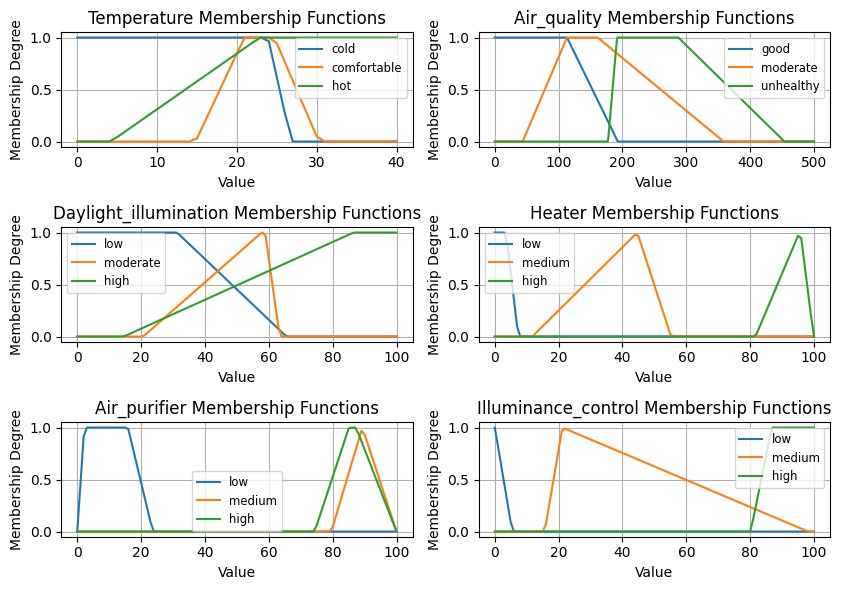

In [21]:
plot_all_membership_functions(fuzzy_variables)


In [22]:
# Calculate MSE
flc = configure_fuzzy_logic(best_chromosome)
mse_results = calculate_mse(dataset, flc)
print(f"MSE Results: {mse_results}")

MSE Results: {'heater': np.float64(25.398212125280285), 'air_purifier': np.float64(44.842439104957144), 'illuminance_control': np.float64(15.016975947529641)}


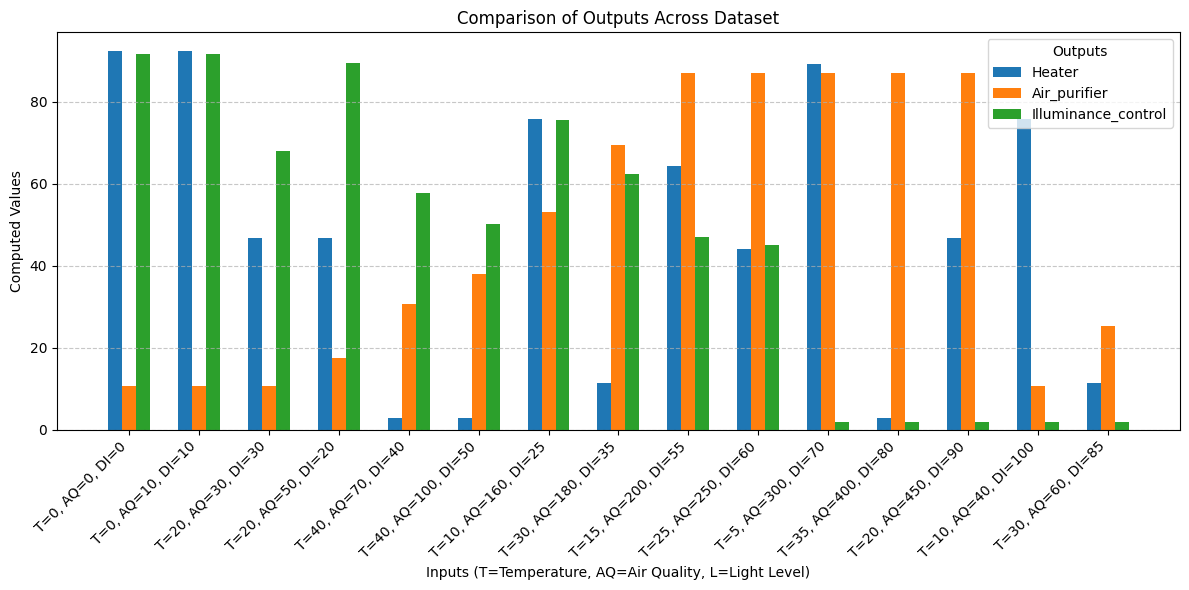

In [23]:
create_combined_bar_plot_with_inputs(dataset, flc, output_names)

In [25]:
total_error, average_error, individual_errors = test_best_chromosome(initial_chromosome, dataset)
   
print("\nIndividual Errors per Test Case:", individual_errors)


=== Testing Best Chromosome ===
Input (Temp, Air Quality, Light Level)             Expected (Heater, Air Purifier, illuminance_control) Output (Heater, Air Purifier, illuminance_control) Individual Error( Heater Error, Air Purifier Error, illuminance_control Error)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
0, 0 AQI, 0                                        100%, 0%, 100                                      87.33%, 15.56%, 84.44%                             12.67, 15.56, 15.56 
0, 10 AQI, 10                                      100%, 4%, 90                                       87.33%, 15.56%, 84.44%                             12.67, 11.56, 5.56 
20, 30 AQI, 30                                     50%, 12%, 70                                       67.32%, 15.56%, 50.00%                             17.32, 3.56, 20.00 
20, 50 AQI, 20                            

### Task 2 Part III

Results for Shifted Schwefel (F4) (D=2):
GA: Avg=273.8486, Std=1591.2138, Best=-1179.1096, Worst=5744.1244
PSO: Avg=-9925.5757, Std=4364.7810, Best=-18525.6284, Worst=-3966.8790


/var/folders/36/85bpp2d50bd75m7hdy7vn3700000gn/T/ipykernel_72995/1429875689.py:151: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1].boxplot([ga_results, pso_results], labels=['GA', 'PSO'])


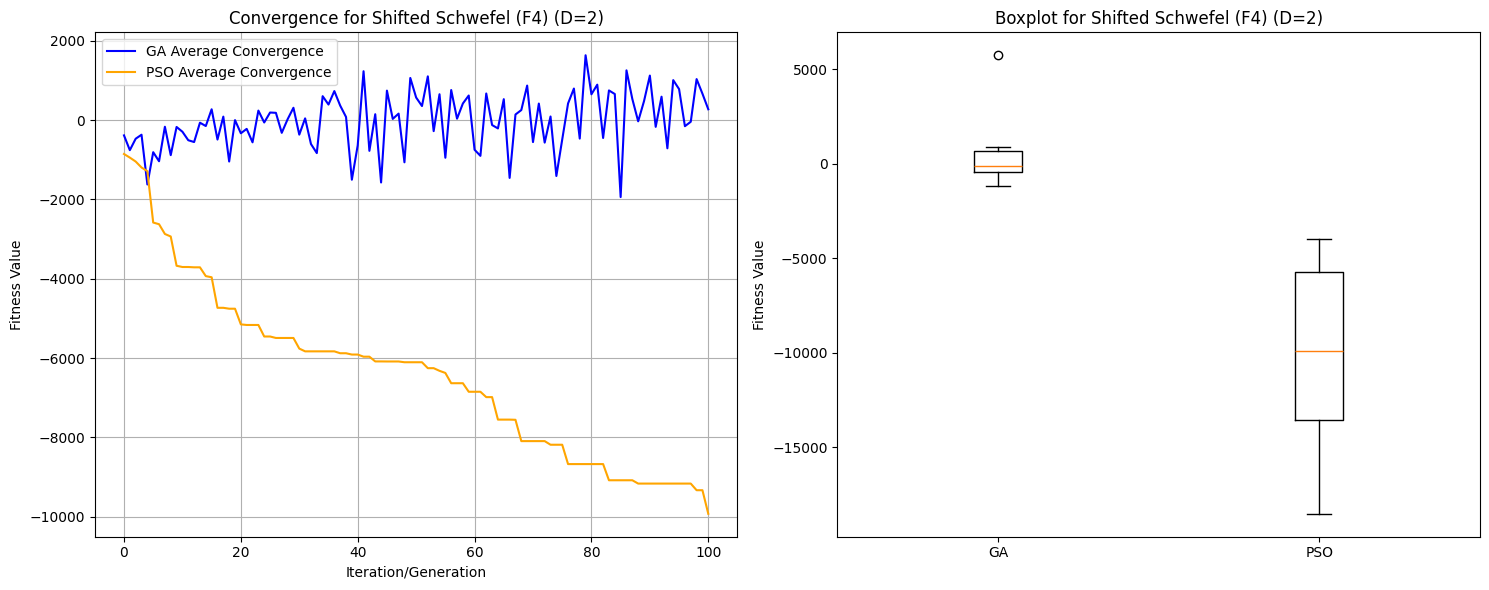

Results for Shifted Rastrigin (F9) (D=2):
GA: Avg=622.1024, Std=177.6189, Best=339.5924, Worst=911.3609
PSO: Avg=328.7785, Std=0.8415, Best=327.4599, Worst=330.4235


/var/folders/36/85bpp2d50bd75m7hdy7vn3700000gn/T/ipykernel_72995/1429875689.py:151: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1].boxplot([ga_results, pso_results], labels=['GA', 'PSO'])


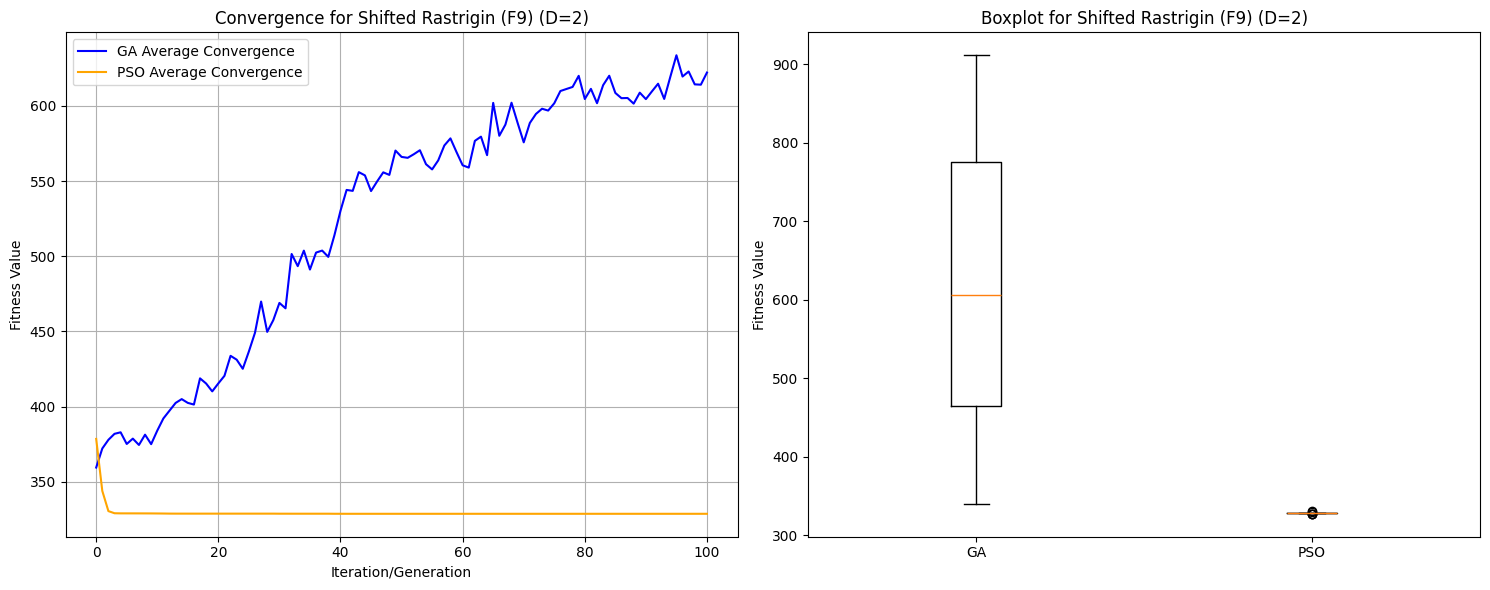

Results for Shifted Schwefel (F4) (D=10):
GA: Avg=26892.9321, Std=38954.5991, Best=-3589.7022, Worst=147006.7972
PSO: Avg=-151648.9546, Std=206652.7364, Best=-819372.9524, Worst=-20859.5891


/var/folders/36/85bpp2d50bd75m7hdy7vn3700000gn/T/ipykernel_72995/1429875689.py:151: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1].boxplot([ga_results, pso_results], labels=['GA', 'PSO'])


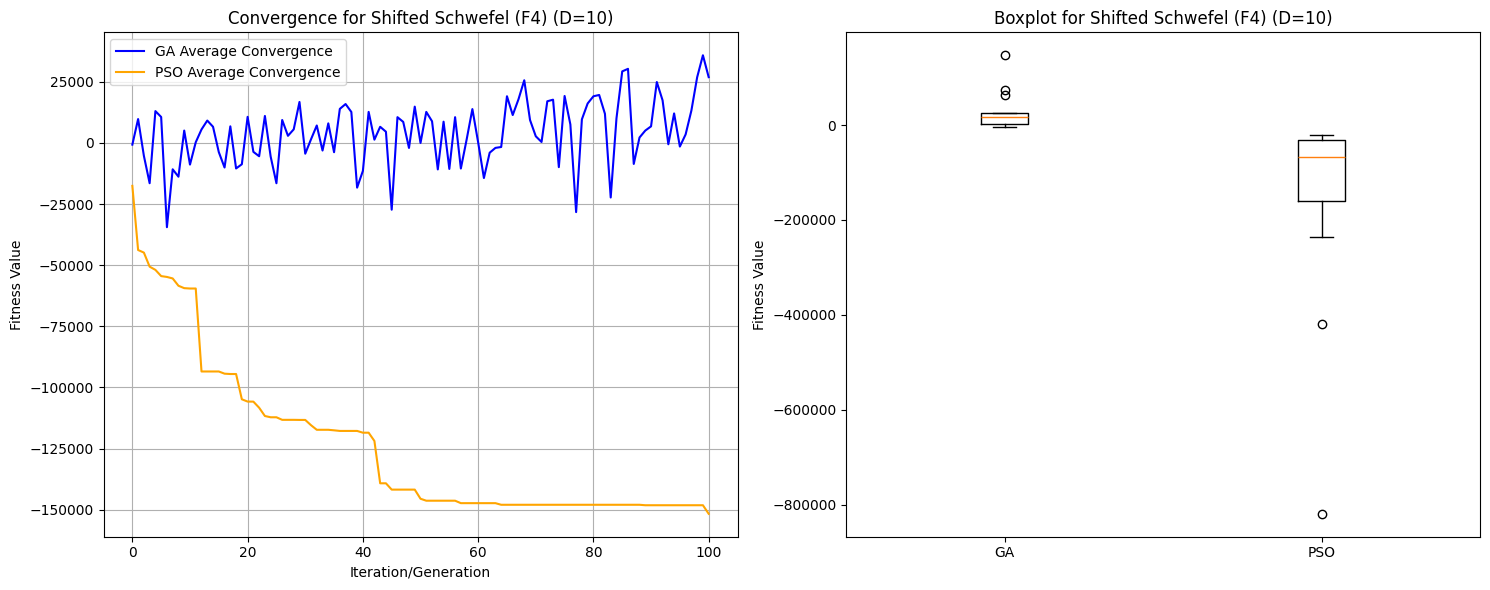

Results for Shifted Rastrigin (F9) (D=10):
GA: Avg=28713.0366, Std=840.1989, Best=26775.9768, Worst=30156.1229
PSO: Avg=25428.0317, Std=53.7219, Best=25397.5824, Worst=25609.6161


/var/folders/36/85bpp2d50bd75m7hdy7vn3700000gn/T/ipykernel_72995/1429875689.py:151: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1].boxplot([ga_results, pso_results], labels=['GA', 'PSO'])


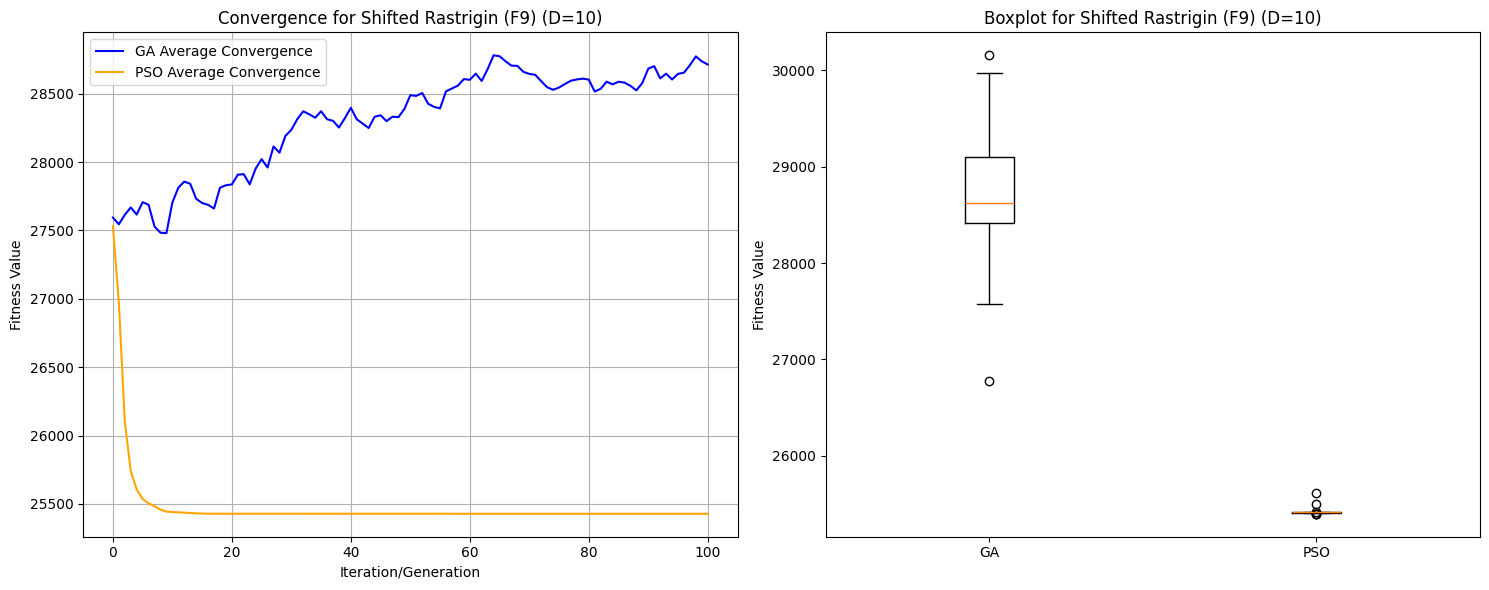

Results for Shifted Schwefel (F4) (D=100):
GA: Avg=5487040.5639, Std=5702255.0199, Best=-3039904.8430, Worst=16658489.8944
PSO: Avg=-12910145.7606, Std=9696388.6883, Best=-36043234.5728, Worst=-2838089.0048


/var/folders/36/85bpp2d50bd75m7hdy7vn3700000gn/T/ipykernel_72995/1429875689.py:151: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1].boxplot([ga_results, pso_results], labels=['GA', 'PSO'])


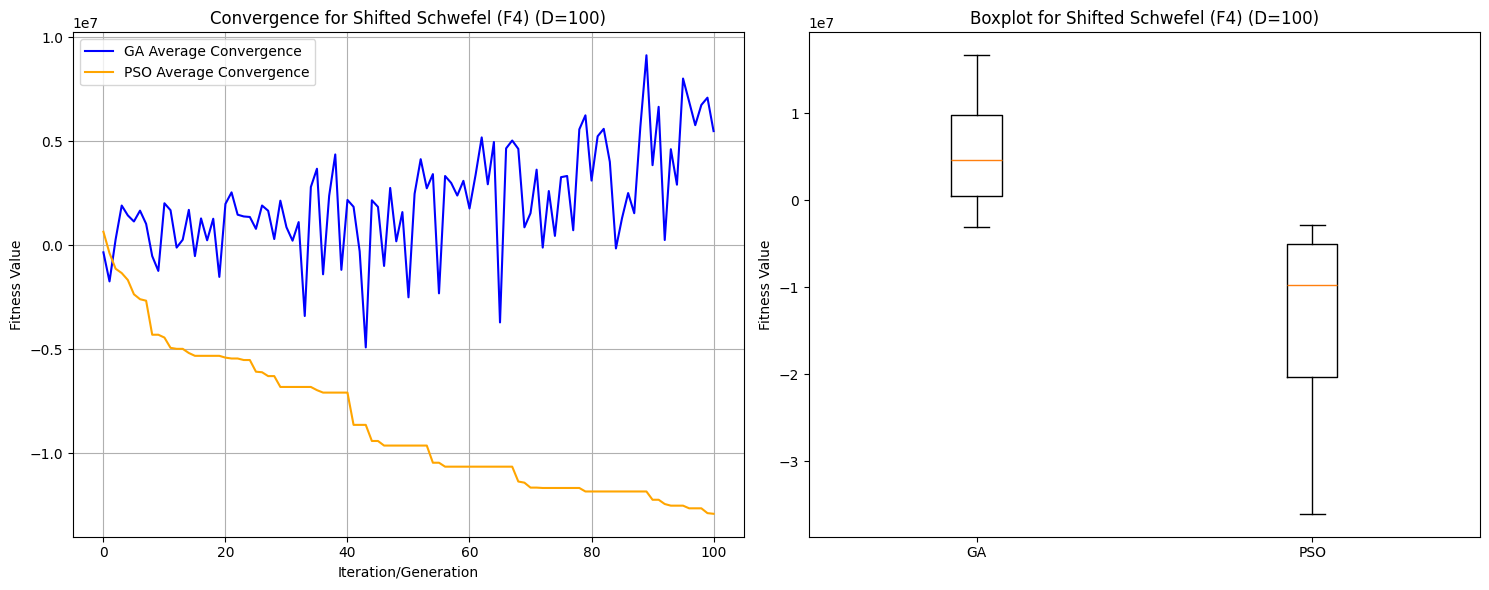

Results for Shifted Rastrigin (F9) (D=100):
GA: Avg=315275.9218, Std=3031.8410, Best=310762.2509, Worst=319948.7975
PSO: Avg=286381.7188, Std=2236.2414, Best=281643.0858, Worst=290027.5369


/var/folders/36/85bpp2d50bd75m7hdy7vn3700000gn/T/ipykernel_72995/1429875689.py:151: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1].boxplot([ga_results, pso_results], labels=['GA', 'PSO'])


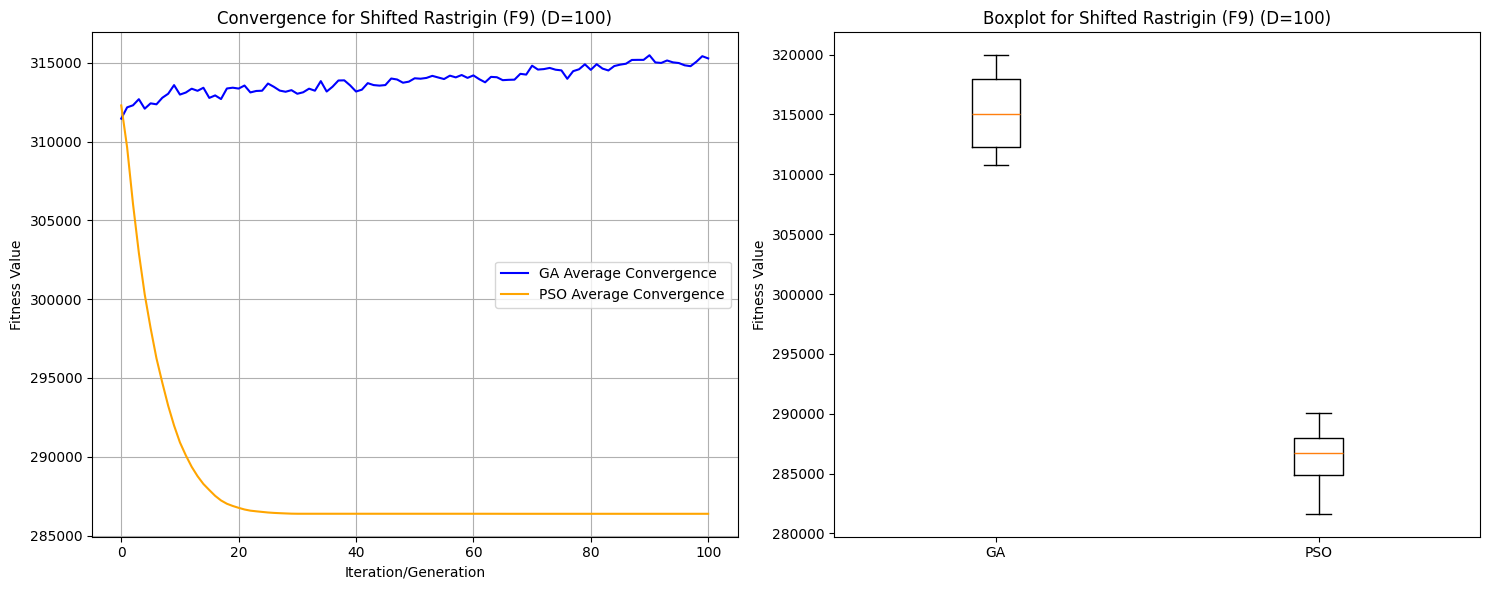

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Shifted Schwefel's Problem with Noise in Fitness (F4)
def shifted_schwefel(x, o):
    z = x - o[:len(x)]
    D = len(x)
    noise = 1 + 0.4 * np.random.normal(0, 1)
    f_bias = -450
    result = sum([(sum(z[:i + 1])) ** 2 for i in range(D)]) * noise + f_bias
    return result

# Shifted Rastrigin's Function (F9)
def shifted_rastrigin(x, o):
    z = x - o[:len(x)]
    D = len(x)
    f_bias = -330
    result = sum([z[i] ** 2 - 10 * np.cos(2 * np.pi * z[i]) + 10 for i in range(D)]) + f_bias
    return result

# Genetic Algorithm
def genetic_algorithm(func, o, bounds, dims, generations, pop_size):
    convergence = []
    population = np.random.uniform(bounds[0], bounds[1], (pop_size, dims))
    fitness = np.array([func(ind, o) for ind in population])
    best_fitness = np.min(fitness)
    convergence.append(best_fitness)

    for _ in range(generations):
        # Tournament Selection
        parents = population[np.random.choice(range(pop_size), size=(pop_size, 2)), :]
        parent_fitness = fitness[np.random.choice(range(pop_size), size=(pop_size, 2))]
        selected = parents[np.arange(pop_size), np.argmin(parent_fitness, axis=1)]

        # Crossover
        crossover_point = np.random.randint(1, dims)
        offspring = np.array([
            np.concatenate((selected[i][:crossover_point], selected[(i + 1) % pop_size][crossover_point:]))
            for i in range(pop_size)
        ])

        # Mutation
        mutation_prob = 0.1
        mutation_indices = np.random.rand(*offspring.shape) < mutation_prob
        offspring[mutation_indices] += np.random.uniform(-1, 1, size=np.sum(mutation_indices))

        # Evaluate new population
        population = offspring
        fitness = np.array([func(ind, o) for ind in population])
        best_fitness = np.min(fitness)
        convergence.append(best_fitness)

    return best_fitness, convergence

# Particle Swarm Optimization
def particle_swarm_optimization(func, o, bounds, dims, iterations, swarm_size):
    convergence = []
    position = np.random.uniform(bounds[0], bounds[1], (swarm_size, dims))
    velocity = np.zeros((swarm_size, dims))
    personal_best = position.copy()
    personal_best_fitness = np.array([func(ind, o) for ind in position])
    global_best = personal_best[np.argmin(personal_best_fitness)]
    global_best_fitness = np.min(personal_best_fitness)
    convergence.append(global_best_fitness)

    for _ in range(iterations):
        r1, r2 = np.random.rand(swarm_size, dims), np.random.rand(swarm_size, dims)
        velocity = 0.7 * velocity + 1.5 * r1 * (personal_best - position) + 1.5 * r2 * (global_best - position)
        position += velocity
        position = np.clip(position, bounds[0], bounds[1])

        fitness = np.array([func(ind, o) for ind in position])
        better_indices = fitness < personal_best_fitness
        personal_best[better_indices] = position[better_indices]
        personal_best_fitness[better_indices] = fitness[better_indices]

        if np.min(fitness) < global_best_fitness:
            global_best = position[np.argmin(fitness)]
            global_best_fitness = np.min(fitness)

        convergence.append(global_best_fitness)

    return global_best_fitness, convergence

# Main Experiment Runner
def run_experiment():
    # Functions and parameters
    functions = [shifted_schwefel, shifted_rastrigin]
    function_names = ['Shifted Schwefel (F4)', 'Shifted Rastrigin (F9)']
    bounds_list = [(-100, 100), (-5, 5)]
    dimensions_list = [2, 10, 100]
    o_shifted = np.random.uniform(-100, 100, 100)

    ga_generations = 100
    ga_pop_size = 50
    pso_iterations = 100
    pso_swarm_size = 50
    runs = 15

    for dims in dimensions_list:
        for i, func in enumerate(functions):
            bounds = bounds_list[i]

            # Run experiments for GA
            ga_results = []
            ga_convergences = []

            for _ in range(runs):
                ga_best, ga_convergence = genetic_algorithm(func, o_shifted, bounds, dims, ga_generations, ga_pop_size)
                ga_results.append(ga_best)
                ga_convergences.append(ga_convergence)

            ga_avg = np.mean(ga_results)
            ga_std = np.std(ga_results)
            ga_best_run = np.min(ga_results)
            ga_worst_run = np.max(ga_results)

            # Run experiments for PSO
            pso_results = []
            pso_convergences = []

            for _ in range(runs):
                pso_best, pso_convergence = particle_swarm_optimization(func, o_shifted, bounds, dims, pso_iterations, pso_swarm_size)
                pso_results.append(pso_best)
                pso_convergences.append(pso_convergence)

            pso_avg = np.mean(pso_results)
            pso_std = np.std(pso_results)
            pso_best_run = np.min(pso_results)
            pso_worst_run = np.max(pso_results)

            # Print results
            print(f"Results for {function_names[i]} (D={dims}):")
            print(f"GA: Avg={ga_avg:.4f}, Std={ga_std:.4f}, Best={ga_best_run:.4f}, Worst={ga_worst_run:.4f}")
            print(f"PSO: Avg={pso_avg:.4f}, Std={pso_std:.4f}, Best={pso_best_run:.4f}, Worst={pso_worst_run:.4f}")

            # Plot convergence and boxplot side by side
            fig, axs = plt.subplots(1, 2, figsize=(15, 6))

            # Convergence Plot
            axs[0].plot(np.mean(ga_convergences, axis=0), label='GA Average Convergence', color='blue')
            axs[0].plot(np.mean(pso_convergences, axis=0), label='PSO Average Convergence', color='orange')
            axs[0].set_title(f'Convergence for {function_names[i]} (D={dims})')
            axs[0].set_xlabel('Iteration/Generation')
            axs[0].set_ylabel('Fitness Value')
            axs[0].legend()
            axs[0].grid()

            # Boxplot
            axs[1].boxplot([ga_results, pso_results], labels=['GA', 'PSO'])
            axs[1].set_title(f'Boxplot for {function_names[i]} (D={dims})')
            axs[1].set_ylabel('Fitness Value')

            plt.tight_layout()
            plt.show()

# Run the experiment
run_experiment()